In [ ]:
import pandas as pd
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt
import random
import seaborn as sns
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/MyDrive/archive (1)/Medical mask/Medical mask/Medical Mask/annotations'
image_directory = '/content/drive/MyDrive/archive (1)/Medical mask/Medical mask/Medical Mask/images'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive (1)/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/archive (1)/submission.csv')

In [ ]:
proto_file = '/content/drive/MyDrive/deploy.prototxt.txt'
model_file = '/content/drive/MyDrive/res10_300x300_ssd_iter_140000.caffemodel'


In [ ]:
cvNet = cv2.dnn.readNetFromCaffe(proto_file, model_file)
def getJSON(filePathandName):
    with open(filePathandName, 'r') as f:
        return json.load(f)

In [ ]:
len(os.listdir(directory))

4326

In [ ]:
jsonfiles = []
for i in os.listdir(directory):
  jsonfiles.append(getJSON(os.path.join(directory, i)))

In [ ]:
jsonfiles[0]

{'FileName': '5313.jpeg',
 'NumOfAnno': 2,
 'Annotations': [{'isProtected': False,
   'ID': 445675916796150720,
   'BoundingBox': [521, 239, 781, 335],
   'classname': 'sunglasses',
   'Confidence': 1,
   'Attributes': {}},
  {'isProtected': False,
   'ID': 419723905046783360,
   'BoundingBox': [488, 111, 811, 493],
   'classname': 'face_other_covering',
   'Confidence': 1,
   'Attributes': {}}]}

In [ ]:
len(os.listdir(image_directory))

6037

In [ ]:
df.head()

name   x1   x2   y1   y2       classname
0  2756.png   69  126  294  392  face_with_mask
1  2756.png  505   10  723  283  face_with_mask
2  2756.png   75  252  264  390   mask_colorful
3  2756.png  521  136  711  277   mask_colorful
4  6098.jpg  360   85  728  653    face_no_mask

In [ ]:
df['classname'].value_counts()

face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64

In [ ]:
df.loc[df['classname'] == 'mask_surgical', 'classname'] = 'face_with_mask'

In [ ]:
df[df['classname'] == 'mask_colorful']

name   x1   x2   y1   y2      classname
2      2756.png   75  252  264  390  mask_colorful
3      2756.png  521  136  711  277  mask_colorful
8      4591.png  255  159  491  341  mask_colorful
14     4287.png  160  312  588  595  mask_colorful
18     4893.png  185  214  584  596  mask_colorful
...         ...  ...  ...  ...  ...            ...
15383  3646.png  156  300  426  526  mask_colorful
15397  4149.png   66   92  403  370  mask_colorful
15398  4149.png  439  400  719  578  mask_colorful
15400  3389.png  143  246  417  453  mask_colorful
15411  3216.png  136  289  393  461  mask_colorful

[1876 rows x 6 columns]

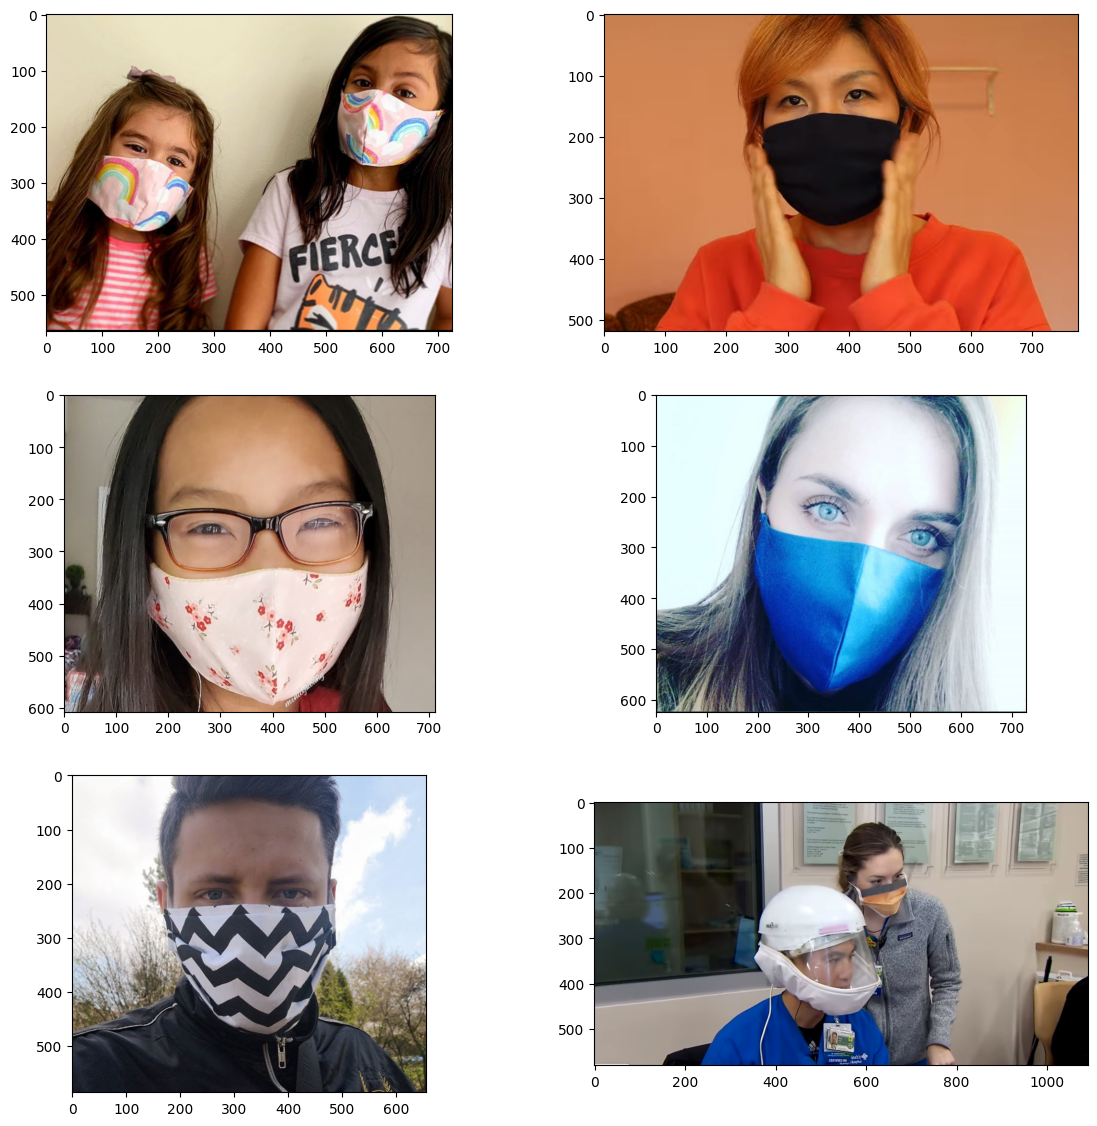

In [ ]:
fig = plt.figure(figsize=(14, 14))
axes = []
rows = 3
cols = 2
for i, im in enumerate(df[df['classname'] == 'mask_colorful']['name'].unique()):
  if i==6:
    break
  image = cv2.imread(os.path.join(image_directory,im),1)
  axes.append(fig.add_subplot(rows, cols, i+1))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))




In [ ]:
df.loc[df['classname'] == 'mask_colorful', 'classname'] = 'face_with_mask'

In [ ]:
df[df['classname'] == 'face_other_covering']

name   x1   x2   y1   y2            classname
9      5392.jpg  261    0  444  257  face_other_covering
26     3754.png  353  181  641  478  face_other_covering
30     5342.jpg  374   17  467  136  face_other_covering
47     3939.png  626  106  666  159  face_other_covering
75     6358.jpg  717   60  912  312  face_other_covering
...         ...  ...  ...  ...  ...                  ...
15387  4054.png   45    4  379  400  face_other_covering
15390  3621.png  512  164  591  281  face_other_covering
15393  3621.png  133  235  218  353  face_other_covering
15402  4883.png  236   22  497  343  face_other_covering
15404  2460.png  261   36  417  239  face_other_covering

[1372 rows x 6 columns]

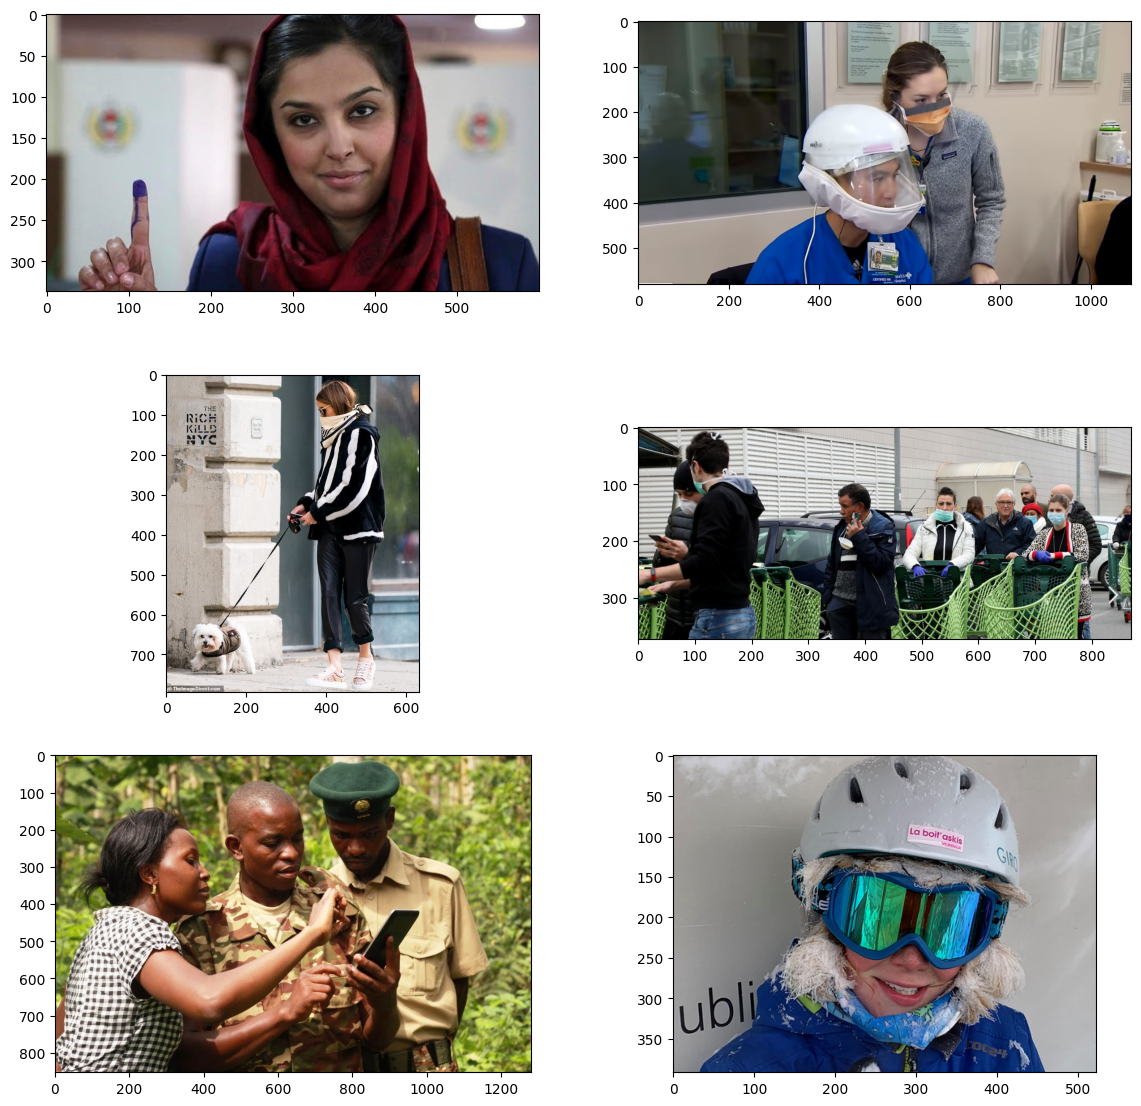

In [ ]:
fig = plt.figure(figsize=(14, 14))
axes = []
rows = 3
cols = 2
for i, im in enumerate(df[df['classname'] == 'face_other_covering']['name'].unique()):
  if i==6:
    break
  image = cv2.imread(os.path.join(image_directory,im),1)
  axes.append(fig.add_subplot(rows, cols, i+1))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
df.drop(df[df['classname'] == 'face_other_covering'].index, inplace=True)

In [ ]:
df[df['classname'] == 'eyeglasses']

name   x1   x2    y1   y2   classname
15     4287.png  166  201   592  336  eyeglasses
48     3939.png  633  129   663  145  eyeglasses
67     2588.png  170  317   406  400  eyeglasses
78     2407.png  212  186   531  297  eyeglasses
86     4356.png  504  288   577  311  eyeglasses
...         ...  ...  ...   ...  ...         ...
15351  5107.jpg  963  395  1044  439  eyeglasses
15361  5576.jpg  393  160  1046  318  eyeglasses
15365  5416.jpg  198  112   407  203  eyeglasses
15382  3646.png  170  251   451  360  eyeglasses
15403  4883.png  279  137   504  218  eyeglasses

[914 rows x 6 columns]

In [ ]:
df.drop(df[df['classname'] == 'eyeglasses'].index, inplace=True)
df.drop(df[df['classname'] == 'hat'].index, inplace=True)

In [ ]:
df['classname'].value_counts()

face_with_mask              8486
face_no_mask                1569
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64

In [ ]:
df.drop(df[(df['classname'] != 'face_with_mask') & (df['classname'] != 'face_no_mask')].index, inplace=True)

In [ ]:
len(df['name'].unique())

3473

In [ ]:
data = []
img_size = 124
mask = ['face_with_mask']
non_mask = ['face_no_mask']
labels = {'mask': 0, 'without_mask': 1}
for i in df['name'].unique():
    f = i + '.json'
    for j in getJSON(os.path.join(directory,f)).get('Annotations'):
        if j['classname'] in mask:
            x, y, w, h = j['BoundingBox']
            img = cv2.imread(os.path.join(image_directory, i), 1)
            img = img[y:h,x:w]
            img = cv2.resize(img,(img_size, img_size))
            data.append([img, labels['mask']])
        if j['classname'] in non_mask:
            x, y, w, h = j['BoundingBox']
            img = cv2.imread(os.path.join(image_directory, i), 1)
            img = img[y:h,x:w]
            img = cv2.resize(img,(img_size, img_size))
            data.append([img, labels['without_mask']])
random.shuffle(data)

p = []
for face in data:
    if face[1] == 0:
        p.append("Mask")
    else:
        p.append("No Mask")


<Axes: ylabel='Count'>

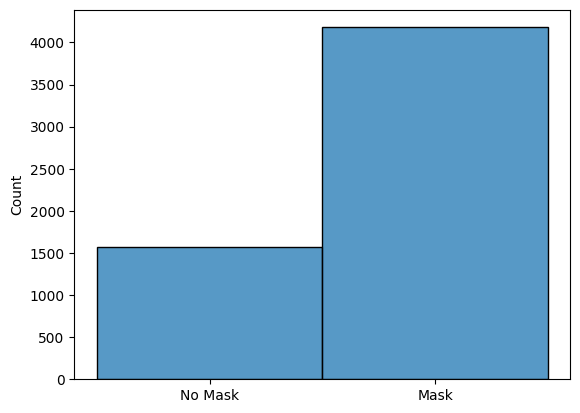

In [ ]:
sns.histplot(p)

In [ ]:
X = []
Y = []
for features,label in data:
  X.append(features)
  Y.append(label)

X = np.array(X) / 255.0

In [ ]:
X.shape

(5749, 124, 124, 3)

In [ ]:
Y = np.array(Y)

In [ ]:
len(X) == len(Y)

True

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(124, 124, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
xtrain,xval,ytrain,yval = train_test_split(X, Y, train_size=0.8, random_state=0)
datagen = ImageDataGenerator(
                              rotation_range=15,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              vertical_flip=False
                             )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 flatten (Flatten)           (None, 57600)             0

In [ ]:
my_callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/augmentation_model_best_weights', save_best_only=True)]

In [ ]:
datagen.fit(xtrain)

In [ ]:
model.load_weights('/content/drive/MyDrive/augmentation_model_best_weights')

In [ ]:
result = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32), steps_per_epoch=xtrain.shape[0] // 32, epochs=20, validation_data=(xval,yval), callbacks=my_callbacks)

<ipython-input-35-9fdc8f03d5ac>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32), steps_per_epoch=xtrain.shape[0] // 32, epochs=20, validation_data=(xval,yval), callbacks=my_callbacks)


Epoch 1/20
143/143 [==============================] - 39s 173ms/step - loss: 0.3811 - accuracy: 0.8380 - val_loss: 0.2176 - val_accuracy: 0.9104
Epoch 2/20
143/143 [==============================] - 24s 167ms/step - loss: 0.2711 - accuracy: 0.8896 - val_loss: 0.2067 - val_accuracy: 0.9165
Epoch 3/20
143/143 [==============================] - 21s 148ms/step - loss: 0.2615 - accuracy: 0.8975 - val_loss: 0.1925 - val_accuracy: 0.9243
Epoch 4/20
143/143 [==============================] - 23s 164ms/step - loss: 0.2483 - accuracy: 0.9002 - val_loss: 0.1804 - val_accuracy: 0.9322
Epoch 5/20
143/143 [==============================] - 22s 154ms/step - loss: 0.2237 - accuracy: 0.9115 - val_loss: 0.1755 - val_accuracy: 0.9357
Epoch 6/20
143/143 [==============================] - 20s 141ms/step - loss: 0.2258 - accuracy: 0.9107 - val_loss: 0.1822 - val_accuracy: 0.9322
Epoch 7/20
143/143 [==============================] - 22s 151ms/step - loss: 0.2186 - accuracy: 0.9135 - val_loss: 0.1742 - val_ac

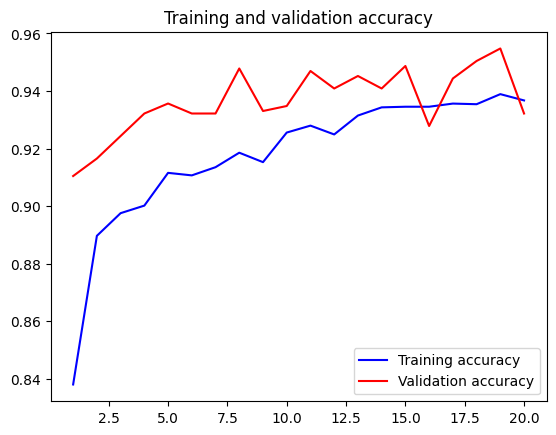

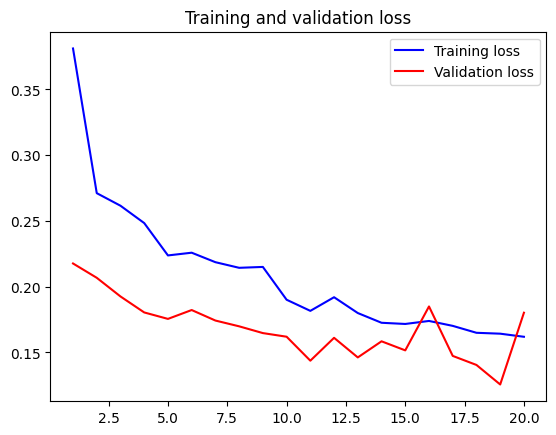

In [ ]:
accuracy = result.history['accuracy']
val_accuracy = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/mymodel_withaugmentation')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/mymodel_withaugmentation')

In [ ]:
new_model

(1, 3, 300, 300)
1/1 [==============================] - 0s 34ms/step
(1, 3, 300, 300)
1/1 [==============================] - 0s 25ms/step
(1, 3, 300, 300)
1/1 [==============================] - 0s 16ms/step
(1, 3, 300, 300)
1/1 [==============================] - 0s 19ms/step
(1, 3, 300, 300)
1/1 [==============================] - 0s 16ms/step
(1, 3, 300, 300)
1/1 [==============================] - 0s 16ms/step


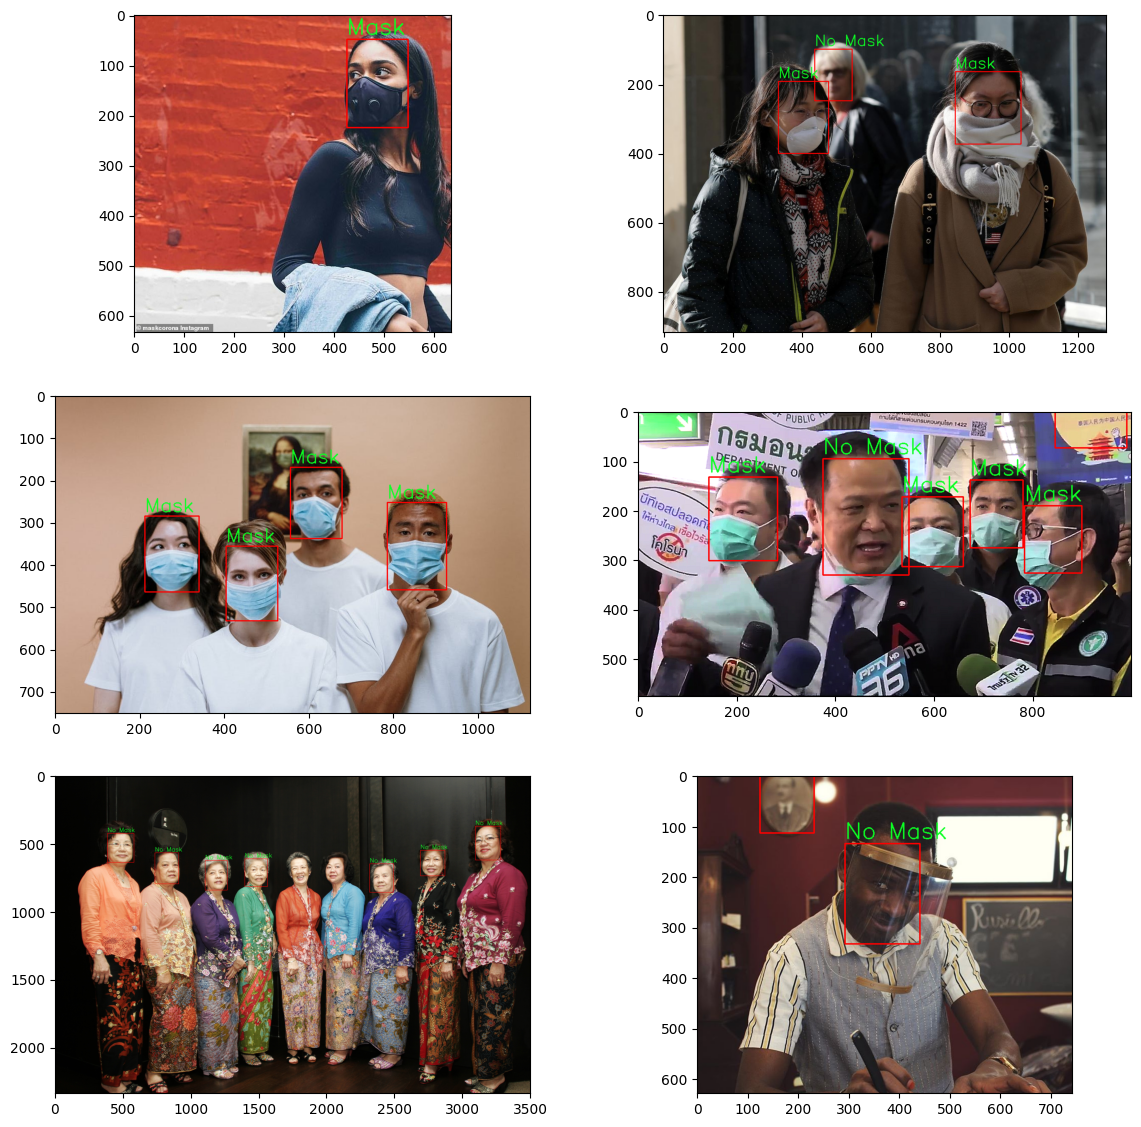

In [ ]:
test_images = ['1114.png','1504.jpg', '0072.jpg','6433.png','6364.jpg','6429.png']
fig = plt.figure(figsize=(14, 14))
rows = 3
gamma=2.0
cols = 2
axes = []
assign = {'0':'Mask','1':"No Mask"}
for j,im in enumerate(test_images):
  image = cv2.imread(os.path.join(image_directory,im),1)
  # image =  adjust_gamma(image, gamma=gamma)
  (h, w) = image.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
  print(blob.shape)
  cvNet.setInput(blob)
  detections = cvNet.forward()
  for i in range(0, detections.shape[2]):
    try:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            frame = image[startY:endY, startX:endX]
            confidence = detections[0, 0, i, 2]
            if confidence > 0.2:
                im = cv2.resize(frame,(img_size,img_size))
                im = np.array(im)/255.0
                im = im.reshape(1,124,124,3)
                result = model.predict(im)
                if result>0.5:
                    label_Y = 1
                else:
                    label_Y = 0
                cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
                cv2.putText(image,assign[str(label_Y)] , (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36,255,12), 2)

    except:pass
  axes.append(fig.add_subplot(rows, cols, j+1))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
